In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.datasets import make_blobs

device = "mps" if torch.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

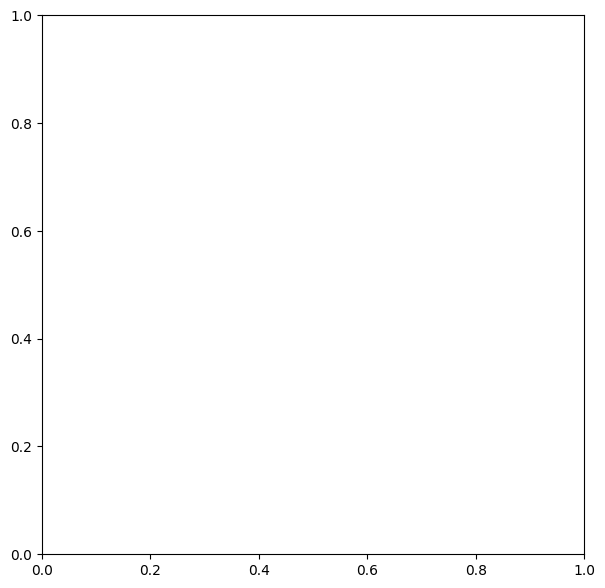

In [ ]:
# Hard 2D classification problem
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=1)
X = torch.tensor(data=X, dtype=torch.float, device=device)
y = torch.tensor(data=y, dtype=torch.long, device=device)

# Plot
plt.figure(figsize=(7, 7))

scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap="tab10",
    s=40,
    edgecolor="k",
    alpha=0.85
)

plt.title("Multi-Class Blobs Dataset", fontsize=14, pad=12)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add color legend
handles, _ = scatter.legend_elements()
labels = [f"Class {i}" for i in np.unique(y)]
plt.legend(handles, labels, title="Classes", loc="best")

plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()
